In [4]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)


TensorFlow version: 2.11.0


In [2]:
pip install numpy==1.24.0


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 13.8 MB/s eta 0:00:00m eta 0:00:010:00:01
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorboard 2.9.1 requires google-auth-oauthlib<0.5,>=0.4.1, which is not installed.
tensorflow 2.9.0 requires flatbuffers<2,>=1.12, which is not installed.
tensorflow 2.9.0 requires keras<2.10.0,>=2.9.0rc0, which is not installed.
tensorflow 2.9.0 requires wrapt>=1.11.0, which is not installed.
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install wrapt>=1.11.0


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.9.0 requires flatbuffers<2,>=1.12, which is not installed.
tensorflow 2.9.0 requires keras<2.10.0,>=2.9.0rc0, which is not installed.
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install flatbuffers==1.12

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.9.0 requires keras<2.10.0,>=2.9.0rc0, which is not installed.
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install keras==2.9.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 7.8 MB/s eta 0:00:00m eta 0:00:010:01:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install google-auth-oauthlib==0.4.1

Note: you may need to restart the kernel to use updated packages.


In [5]:
import tensorflow as tf

# List available physical devices (GPUs)
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print("GPUs available: ", gpus)
else:
    print("No GPUs available.")


GPUs available:  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [2]:
!pip uninstall tensorflow --yes


Found existing installation: tensorflow 2.11.0
Uninstalling tensorflow-2.11.0:
  Successfully uninstalled tensorflow-2.11.0


In [3]:
!pip install tensorflow==2.11.0

  Using cached tensorflow-2.11.0-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (3.1 kB)
Using cached tensorflow-2.11.0-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (588.3 MB)


In [16]:
!pip install opencv-python


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 MB 5.7 MB/s eta 0:00:00m eta 0:00:010:00:01


In [20]:
import os                           
import cv2 as cv

# Get the current working directory
root = os.getcwd()
print("Current Working Directory:", current_directory)

imgPath = os.path.join(root, 'john/COMP535/archive/Truck/Datacluster Truck (1).jpg')
img = cv.imread(imgPath)


Current Working Directory: /home


In [25]:
!pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.7/163.7 kB 2.9 MB/s eta 0:00:00 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 13.8 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.1/301.1 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 17.6 MB/s eta 0:00:0031m18.3 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 17.2 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 17.8 MB/s eta 0:00:00 MB/s eta 0:00:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.1/104.1 kB 8.8 MB/s eta 0:00:00


Processed /home/john/COMP535/archive/Truck/Datacluster Truck (116).jpg in 70.55 seconds


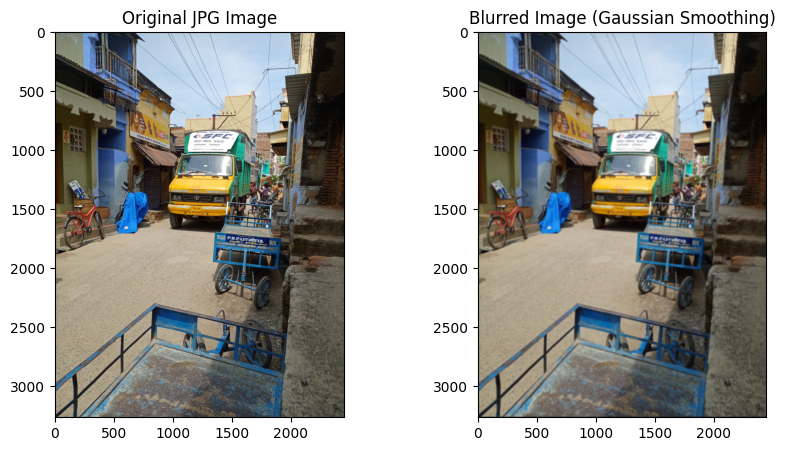

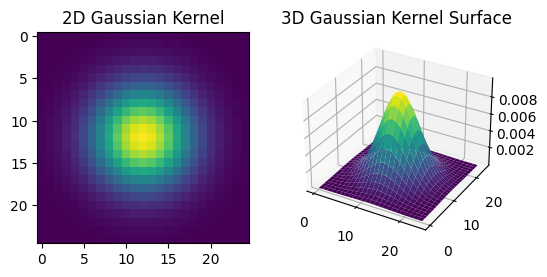

In [14]:
# THIS CELL IS THE TRADITIONAL METHOD ORIGINALLY IMPLEMENTED BY STEPHEN REILLY LARGELY UNALTERED AND SLIGHTLY REFACTORED TO RUN IN JUPYTER
import numpy as np
import os
import matplotlib.pyplot as plt
from PIL import Image
from mpl_toolkits.mplot3d import Axes3D 
import time

# Function to create a Gaussian kernel
def gaussian_kernel(sigma):
    size = int(2 * np.ceil(3 * sigma) + 1)
    kernel = np.zeros((size, size), np.float32)
    center = size // 2
    
    for i in range(size):
        for j in range(size):
            diff_x = i - center
            diff_y = j - center
            kernel[i, j] = (1 / (2 * np.pi * sigma**2)) * np.exp(-(diff_x**2 + diff_y**2) / (2 * sigma**2))
    
    # Normalize the kernel so that its sum is 1
    return kernel / np.sum(kernel)
                                                                                                                            

# Function to apply the Gaussian filter by convolution
def apply_gaussian_smoothing(image_np, kernel):
    kernel_size = kernel.shape[0]
    img_height, img_width = image_np.shape[:2]
    
    # Add padding to the image for convolution
    pad_size = kernel_size // 2
    padded_image = np.pad(image_np, ((pad_size, pad_size), (pad_size, pad_size), (0, 0)), mode='constant')
    
    smoothed_image = np.zeros_like(image_np, dtype=np.float32)
    
    # Convolve the image with the Gaussian kernel
    for i in range(img_height):
        for j in range(img_width):
            for k in range(image_np.shape[2]):  # Loop over color channels (for color images)
                region = padded_image[i:i + kernel_size, j:j + kernel_size, k]
                smoothed_image[i, j, k] = np.sum(region * kernel)
    
    return smoothed_image

# Main function
def main():
    # Load the JPG image file using Pillow
    root = os.getcwd()
    image_path = os.path.join(root, 'COMP535/archive/Truck/Datacluster Truck (116).jpg')
    start_time = time.time()
    image = Image.open(image_path)
    image_np = np.array(image, dtype=np.float32) / 255.0  # Normalize pixel values to [0, 1]

    # Define the Gaussian kernel size and standard deviation
    
    sigma = 4.0       # Increase sigma for more pronounced blur
    kernel_size = int(2 * np.ceil(3 * sigma) + 1)  # Larger kernel for stronger blur

    # Generate the Gaussian kernel
    kernel = gaussian_kernel(sigma)

    # Apply Gaussian smoothing to the image
    smoothed_image = apply_gaussian_smoothing(image_np, kernel)
    end_time = time.time()
    total_time = end_time - start_time
    
    print(f"Processed {image_path} in {total_time:.2f} seconds")
    # Convert the smoothed image back to a NumPy array for visualization
    smoothed_image_np = smoothed_image * 255.0
    smoothed_image_np = smoothed_image_np.astype(np.uint8)

    # Display the original and smoothed images
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(image_np)
    plt.title('Original JPG Image')

    plt.subplot(1, 2, 2)
    plt.imshow(smoothed_image_np)  # Convert back to uint8 for display
    plt.title('Blurred Image (Gaussian Smoothing)')

    plt.show()
        # 2D and 3D visualization of the Gaussian kernel
    fig = plt.figure(figsize=(6, 6))
    
    # 2D Gaussian kernel plot
    plt.subplot(121)
    plt.imshow(kernel, cmap='viridis')
    plt.title('2D Gaussian Kernel')
    
    # 3D Gaussian kernel surface plot
    ax = fig.add_subplot(1, 2, 2, projection="3d")
    x = np.arange(0, kernel_size, 1)
    y = np.arange(0, kernel_size, 1)
    X, Y = np.meshgrid(x, y)
    ax.plot_surface(X, Y, kernel, cmap='viridis')
    ax.set_title('3D Gaussian Kernel Surface')
    
    plt.show()




# Call the main function
if __name__ == '__main__':
    main()


Processed /home/john/COMP535/archive/Truck/Datacluster Truck (116).jpg in 0.10 seconds


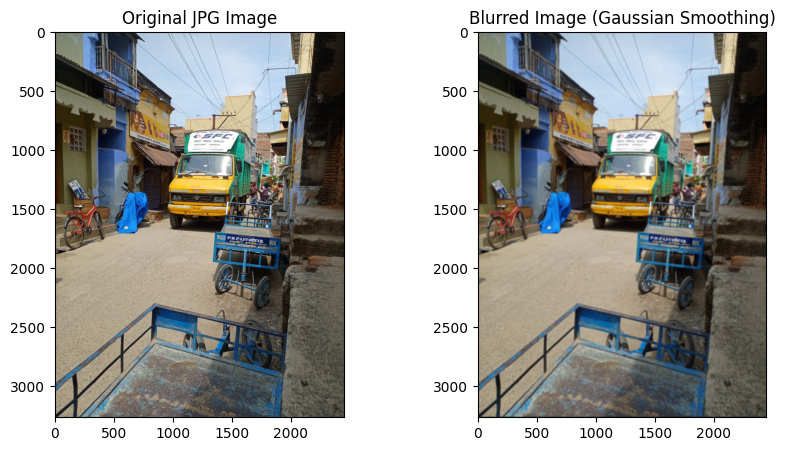

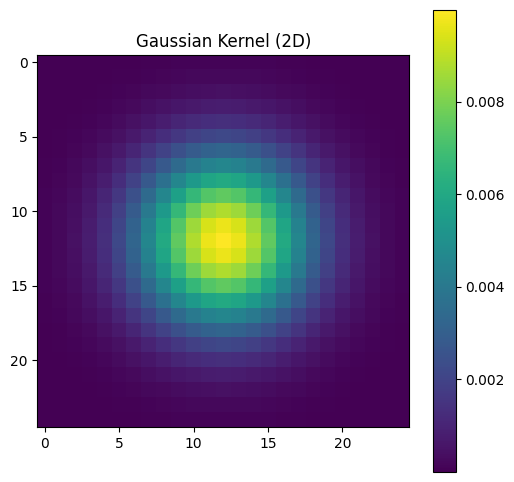

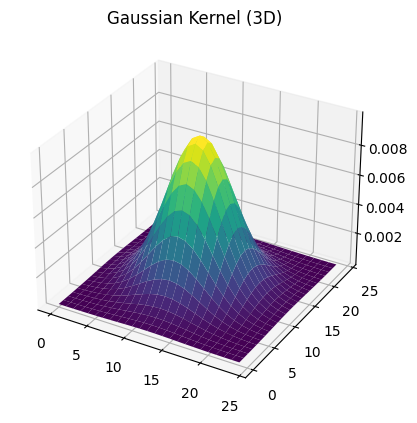

Processed /home/john/COMP535/archive/Truck/Datacluster Truck (13).jpg in 0.24 seconds
Processed /home/john/COMP535/archive/Truck/Datacluster Truck (2).jpg in 0.23 seconds
Processed /home/john/COMP535/archive/Truck/Datacluster Truck (110).jpg in 0.23 seconds
Processed /home/john/COMP535/archive/Truck/Datacluster Truck (104).jpg in 0.25 seconds
Processed /home/john/COMP535/archive/Truck/Datacluster Truck (79).jpg in 0.15 seconds
Processed /home/john/COMP535/archive/Truck/Datacluster Truck (59).jpg in 0.23 seconds
Processed /home/john/COMP535/archive/Truck/Datacluster Truck (37).jpg in 0.24 seconds
Processed /home/john/COMP535/archive/Truck/Datacluster Truck (54).jpg in 0.24 seconds
Processed /home/john/COMP535/archive/Truck/Datacluster Truck (23).jpg in 0.23 seconds
Processed /home/john/COMP535/archive/Truck/Datacluster Truck (139).jpg in 0.24 seconds
Processed /home/john/COMP535/archive/Truck/Datacluster Truck (127).jpg in 0.23 seconds
Processed /home/john/COMP535/archive/Truck/Dataclus

In [12]:
# THIS VERSION OF THE GAUSSIAN KERNEL WAS REFACTORED TO RUN UTILIZING THE GPU INSTEAD OF CPU. The numpy image was converted to a tensor a 
# A depthwise convolutional layer was also added in order to 
import tensorflow as tf
import os
import matplotlib.pyplot as plt
from PIL import Image, ImageFile
import numpy as np
from scipy.ndimage import gaussian_filter
from concurrent.futures import ThreadPoolExecutor, as_completed
import time
ImageFile.LOAD_TRUNCATED_IMAGES = True
def process_images_on_gpu(input_path, output_path, sigma):
    if not os.path.exists(output_path):
        os.makedirs(output_path)

    images = [f for f in os.listdir(input_path) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff'))]
    image_paths = [os.path.join(input_path, f) for f in images]

    start_time = time.time()

    for image_path in image_paths:
         individual_image_time = time.time()
         image = Image.open(image_path)
         image_np = np.array(image, dtype=np.float32) / 255.0

         image_tensor = tf.convert_to_tensor(image_np)

         sigma = 4.0

         kernel = gaussian_kernel(sigma)

         smoothed_image = apply_gaussian_smoothing(image_tensor, kernel)


         if not os.path.exists(output_path):
             os.makedirs(output_path)
 
         output_image_path = os.path.join(output_path, os.path.basename(image_path))
         smoothed_image = Image.fromarray(np.uint8(smoothed_image))
         smoothed_image.save(output_image_path)
         end_image_time = time.time()
         image_time = end_image_time - individual_image_time
         print(f"Processed {image_path} in {image_time:.2f} seconds")

    end_time = time.time()
    total_time = end_time - start_time
    print(f"Processed all data and stored in {total_time:.2f} seconds") 

# Function to create a Gaussian kernel using TensorFlow
def gaussian_kernel(sigma):
    size = int(2 * np.ceil(3 * sigma) + 1)
    center = size // 2
    x = tf.range(-center, center + 1, dtype=tf.float32)
    y = tf.range(-center, center + 1, dtype=tf.float32)
    X, Y = tf.meshgrid(x, y)
    
    kernel = (1 / (2 * np.pi * sigma**2)) * tf.exp(-(X**2 + Y**2) / (2 * sigma**2))
    kernel = kernel / tf.reduce_sum(kernel)  # Normalize the kernel so that its sum is 1
    return kernel

# Function to apply the Gaussian filter using TensorFlow convolution
def apply_gaussian_smoothing(image_tensor, kernel):
    # Add batch dimension
    image_tensor = tf.expand_dims(image_tensor, axis=0)
    
    # Expand kernel to match the number of input channels
    kernel = tf.expand_dims(kernel, axis=-1)  # Add a channel dimension
    kernel = tf.expand_dims(kernel, axis=-1)  # Add filter dimension for depthwise convolution
    kernel = tf.tile(kernel, [1, 1, image_tensor.shape[-1], 1])  # Repeat kernel for each input channel

    # Perform depthwise convolution (applies the same filter to each input channel)
    smoothed_image = tf.nn.depthwise_conv2d(image_tensor, kernel, strides=[1, 1, 1, 1], padding='SAME')
    
    # Remove the batch dimension
    smoothed_image = tf.squeeze(smoothed_image, axis=0)
    return smoothed_image

# Main function
def main():
    # Load the JPG image file using Pillow
    root = os.getcwd()
    image_path = os.path.join(root, 'COMP535/archive/Truck/Datacluster Truck (116).jpg')
    start_time = time.time()
    image = Image.open(image_path)
    image_np = np.array(image, dtype=np.float32) / 255.0  # Normalize pixel values to [0, 1]

    # Convert the image to a TensorFlow tensor
    image_tensor = tf.convert_to_tensor(image_np)

    # Define the Gaussian kernel size and standard deviation
    kernel_size = 32  # Larger kernel for stronger blur
    sigma = 4.0       # Increase sigma for more pronounced blur

    # Generate the Gaussian kernel using TensorFlow
    kernel = gaussian_kernel(sigma)

    # Apply Gaussian smoothing to the image using TensorFlow operations
    smoothed_image = apply_gaussian_smoothing(image_tensor, kernel)
    end_time = time.time()
    total_time = end_time - start_time
    print(f"Processed {image_path} in {total_time:.2f} seconds")

    #smoothed_image = process_image(image_path, sigma)

    # Convert the smoothed image back to a NumPy array for visualization
    smoothed_image_np = smoothed_image.numpy() * 255.0
    smoothed_image_np = smoothed_image_np.astype(np.uint8)

    # Display the original and smoothed images
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(image_np)
    plt.title('Original JPG Image')

    plt.subplot(1, 2, 2)
    
    plt.imshow(smoothed_image_np)
    
    plt.title('Blurred Image (Gaussian Smoothing)')

    plt.show()

    # Display the Gaussian kernel in 2D
    plt.figure(figsize=(6, 6))
    plt.imshow(kernel.numpy(), cmap='viridis')
    plt.title('Gaussian Kernel (2D)')
    plt.colorbar()
    plt.show()

    # Display the Gaussian kernel in 3D
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    x = np.arange(0, kernel.shape[0], 1)
    y = np.arange(0, kernel.shape[1], 1)
    X, Y = np.meshgrid(x, y)
    Z = kernel.numpy()  # Convert TensorFlow tensor to NumPy array
    ax.plot_surface(X, Y, Z, cmap='viridis')
    ax.set_title('Gaussian Kernel (3D)')
    plt.show()

    plt.show()
    input_path = os.path.join(root, 'COMP535/archive/Truck')
    output_path = os.path.join(root, 'COMP535/archive/GPUTruckOutput')
    process_images_on_gpu(input_path, output_path, sigma)
# Call the main function
if __name__ == '__main__':
    main()


Processed /home/john/COMP535/archive/Truck/Datacluster Truck (116).jpg in 0.25 seconds


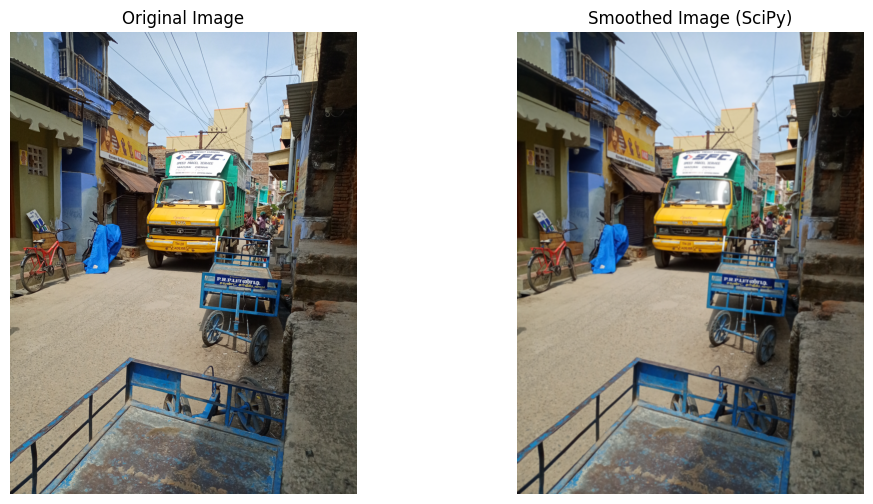

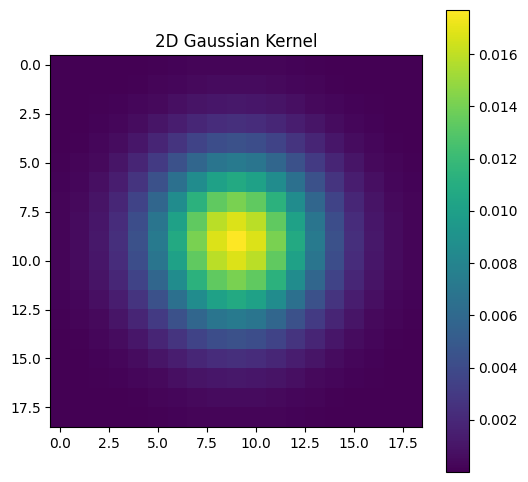

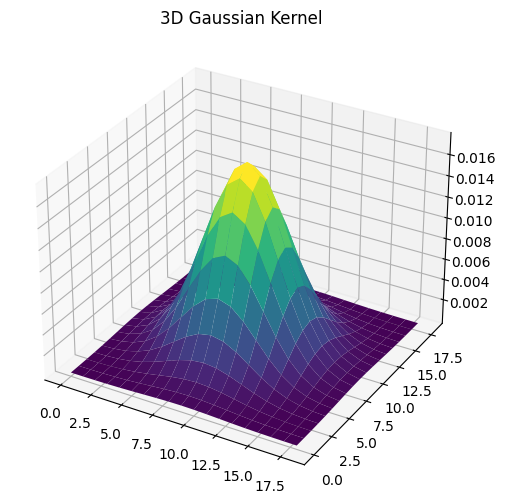

Processed /home/john/COMP535/archive/Truck/Datacluster Truck (33).jpg in 0.59 seconds
Processed /home/john/COMP535/archive/Truck/Datacluster Truck (33).jpg
Processed /home/john/COMP535/archive/Truck/Datacluster Truck (79).jpg in 0.70 seconds
Processed /home/john/COMP535/archive/Truck/Datacluster Truck (116).jpg in 0.70 seconds
Processed /home/john/COMP535/archive/Truck/Datacluster Truck (79).jpg
Processed /home/john/COMP535/archive/Truck/Datacluster Truck (116).jpg
Processed /home/john/COMP535/archive/Truck/Datacluster Truck (129).jpg in 0.80 seconds
Processed /home/john/COMP535/archive/Truck/Datacluster Truck (129).jpg
Processed /home/john/COMP535/archive/Truck/Datacluster Truck (139).jpg in 0.87 seconds
Processed /home/john/COMP535/archive/Truck/Datacluster Truck (156).jpg in 0.86 seconds
Processed /home/john/COMP535/archive/Truck/Datacluster Truck (139).jpg
Processed /home/john/COMP535/archive/Truck/Datacluster Truck (156).jpg
Processed /home/john/COMP535/archive/Truck/Datacluster T

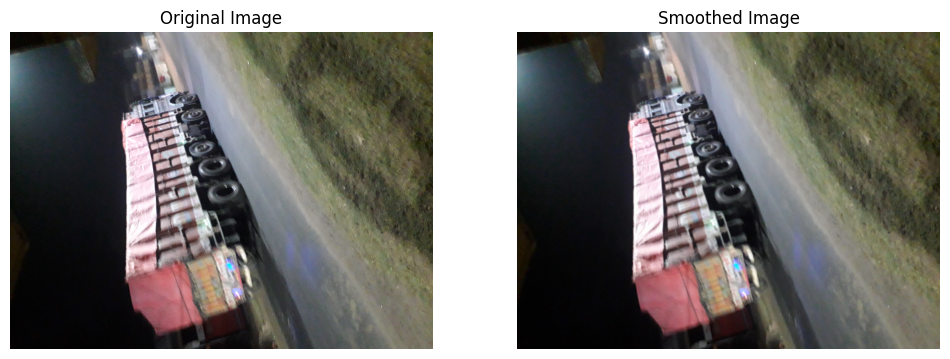

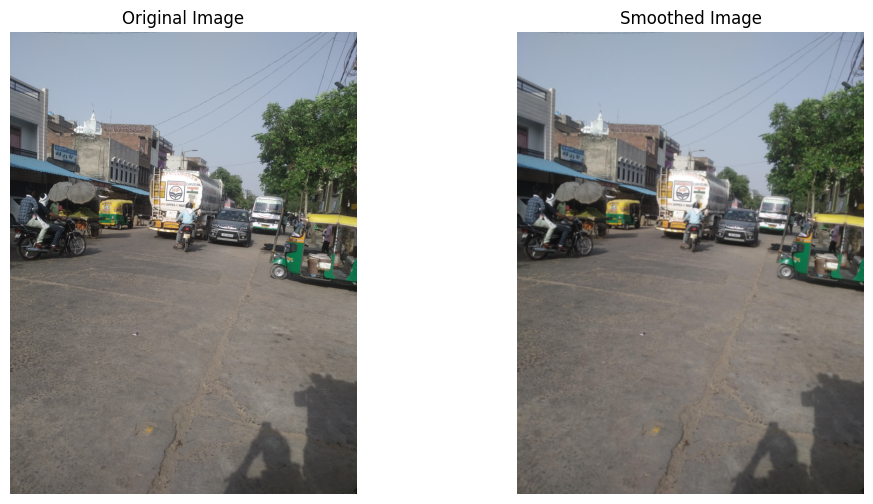

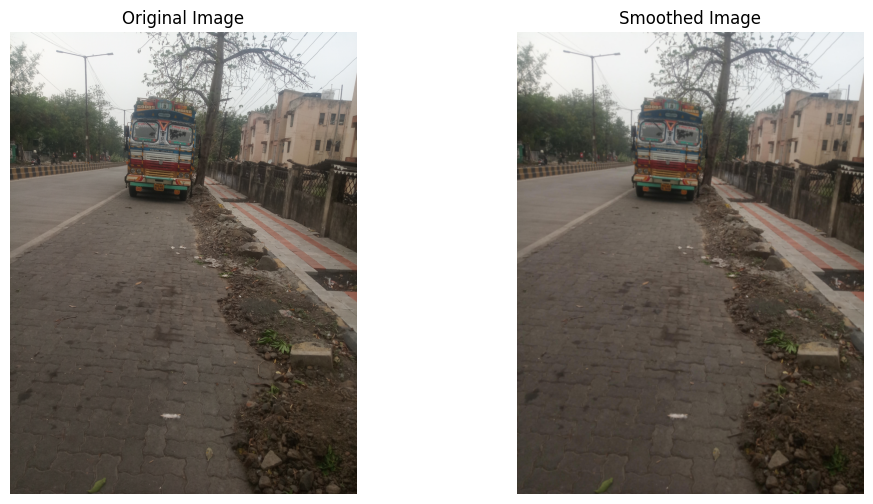

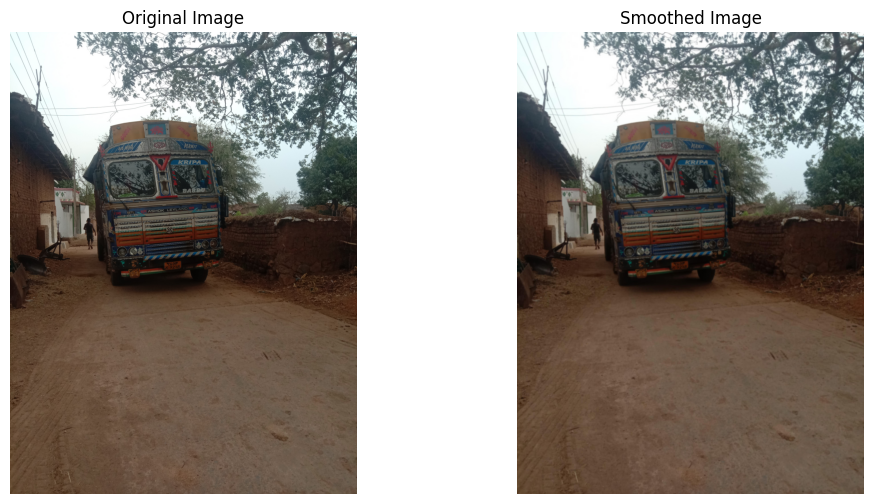

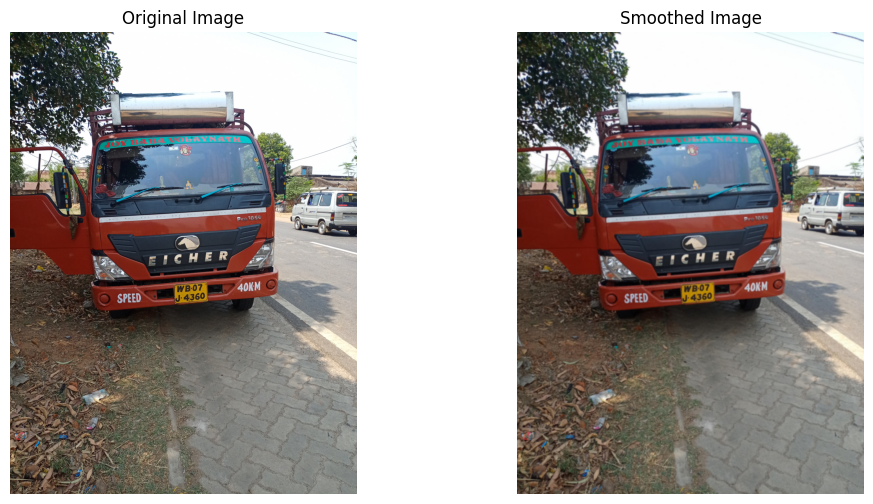

In [31]:
import os
import numpy as np
from PIL import Image
from scipy.ndimage import gaussian_filter
import matplotlib.pyplot as plt
from concurrent.futures import ThreadPoolExecutor, as_completed
import time  # Import the time module

# Function to create a Gaussian kernel manually
def create_gaussian_kernel(sigma):
    size = int(2 * np.ceil(3 * sigma) + 1)
    center = size // 2
    x = np.arange(-center, center + 1)
    y = np.arange(-center, center + 1)
    X, Y = np.meshgrid(x, y)
    
    kernel = (1 / (2 * np.pi * sigma**2)) * np.exp(-(X**2 + Y**2) / (2 * sigma**2))
    return kernel / np.sum(kernel)  # Normalize the kernel

# Function to apply Gaussian smoothing to an image
def process_image_ex(image_path, sigma):
    # Start timer for this image
    start_time = time.time()
    
    # Load the image
    image = Image.open(image_path)
    image_array = np.array(image)
    
    # Apply Gaussian filter to each channel independently if it's an RGB image
    if image_array.ndim == 3:
        smoothed_image_array = np.zeros_like(image_array)
        for channel in range(3):
            smoothed_image_array[:, :, channel] = gaussian_filter(image_array[:, :, channel], sigma=sigma)
    else:
        smoothed_image_array = gaussian_filter(image_array, sigma=sigma)
    
    # End timer and calculate duration
    end_time = time.time()
    duration = end_time - start_time
    print(f"Processed {image_path} in {duration:.2f} seconds")
    
    return smoothed_image_array


# Function to apply the Gaussian filter using TensorFlow convolution
def apply_gaussian_smoothing(image_tensor, kernel):
    # Add batch dimension
    image_tensor = tf.expand_dims(image_tensor, axis=0)
    
    # Expand kernel to match the number of input channels
    kernel = tf.expand_dims(kernel, axis=-1)  # Add a channel dimension
    kernel = tf.expand_dims(kernel, axis=-1)  # Add filter dimension for depthwise convolution
    kernel = tf.tile(kernel, [1, 1, image_tensor.shape[-1], 1])  # Repeat kernel for each input channel

    # Perform depthwise convolution (applies the same filter to each input channel)
    smoothed_image = tf.nn.depthwise_conv2d(image_tensor, kernel, strides=[1, 1, 1, 1], padding='SAME')
    
    # Remove the batch dimension
    smoothed_image = tf.squeeze(smoothed_image, axis=0)
    return smoothed_image

def process_image(image_path, output_path, sigma):
    """
    Processes a single image by applying Gaussian smoothing and saves it.
    """
    start_time = time.time()  # Start timer for this image

    image = Image.open(image_path)
    image_array = np.array(image)
    
    # If the image is in RGB format, apply the filter to each channel
    if image_array.ndim == 3:  # Check if it's an RGB image
        smoothed_image_array = np.zeros_like(image_array)
        for channel in range(3):  # Apply filter to each channel independently
            smoothed_image_array[:, :, channel] = gaussian_filter(image_array[:, :, channel], sigma=sigma)
    else:
        # If grayscale, just apply the filter directly
        smoothed_image_array = gaussian_filter(image_array, sigma=sigma)
    
    smoothed_image = Image.fromarray(np.uint8(smoothed_image_array))
    
    # Create the output folder if it doesn't exist
    if not os.path.exists(output_path):
        os.makedirs(output_path)
    
    output_image_path = os.path.join(output_path, os.path.basename(image_path))
    smoothed_image.save(output_image_path)

    end_time = time.time()  # End timer for this image
    duration = end_time - start_time  # Calculate the time taken
    print(f"Processed {image_path} in {duration:.2f} seconds")  # Print the time taken for each image

    return output_image_path

def process_images_in_parallel(input_path, output_path, sigma):
    """
    Processes images in parallel using ThreadPoolExecutor.
    """
    if not os.path.exists(output_path):
        os.makedirs(output_path)
        
    image_files = [f for f in os.listdir(input_path) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff'))]
    image_paths = [os.path.join(input_path, f) for f in image_files]

    start_time = time.time()  # Start timer for the entire process
    
    with ThreadPoolExecutor() as executor:
        futures = {executor.submit(process_image, image_path, output_path, sigma): image_path for image_path in image_paths}
        for future in as_completed(futures):
            image_path = futures[future]
            try:
                result = future.result()
                print(f"Processed {image_path}")
            except Exception as e:
                print(f"Error processing {image_path}: {e}")

    end_time = time.time()  # End timer for the entire process
    total_duration = end_time - start_time  # Calculate total time taken
    print(f"Processed all images in {total_duration:.2f} seconds")  # Print total time

def display_image_pairs(input_path, output_path, num_pairs=5):
    """
    Displays original and processed images side by side.
    """
    input_images = [f for f in os.listdir(input_path) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff'))]
    image_names = input_images[:num_pairs]
    
    for image_name in image_names:
        input_image_path = os.path.join(input_path, image_name)
        output_image_path = os.path.join(output_path, image_name)
        
        if os.path.exists(output_image_path):
            input_image = Image.open(input_image_path)
            output_image = Image.open(output_image_path)
            
            fig, axes = plt.subplots(1, 2, figsize=(12, 6))
            axes[0].imshow(input_image)
            axes[0].set_title('Original Image')
            axes[0].axis('off')
            
            axes[1].imshow(output_image)
            axes[1].set_title('Smoothed Image')
            axes[1].axis('off')
            
            plt.show()
        else:
            print(f"Processed image not found for {image_name}")
root = os.getcwd()
image_path = os.path.join(root, 'COMP535/archive/Truck/Datacluster Truck (116).jpg')
sigma = 3



# Process a single image and display the result
smoothed_image_array = process_image_ex(image_path, sigma)
smoothed_image = Image.fromarray(np.uint8(smoothed_image_array))

# Display the original and smoothed images
original_image = Image.open(image_path)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(original_image)
axes[0].set_title("Original Image")
axes[0].axis("off")

axes[1].imshow(smoothed_image)
axes[1].set_title("Smoothed Image (SciPy)")
axes[1].axis("off")
plt.show()
input_path = os.path.join(root, 'COMP535/archive/Truck')
output_path = os.path.join(root, 'COMP535/archive/TruckOutput')
# Replace these paths with your actual directories
#input_path = 'home/john/COMP535/archive/Truck'  # Replace with your input folder path
#output_path = 'home/john/COMP535/archive/TruckOutput'  # Replace with your output folder path

impulse = np.zeros((size, size))
impulse[size // 2, size // 2] = 1  # Center pixel as impulse

# Apply Gaussian filter to the impulse image, which gives the kernel shape
filtered_impulse = gaussian_filter(impulse, sigma=sigma)

# 2D Plot of the Gaussian filter kernel shape
plt.figure(figsize=(6, 6))
plt.imshow(filtered_impulse, cmap='viridis')
plt.title("2D Gaussian Kernel")
plt.colorbar()
plt.show()

# 3D Plot of the Gaussian filter kernel shape
x = np.arange(size)
y = np.arange(size)
X, Y = np.meshgrid(x, y)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(X, Y, filtered_impulse, cmap='viridis')
ax.set_title("3D Gaussian Kernel")
plt.show()

# Measure and display the time it takes to process the images
process_images_in_parallel(input_path, output_path, sigma)
display_image_pairs(input_path, output_path, num_pairs=5)

In [12]:
# This approach uses a combination of the custom filter based on Stephen's design with optimizations added by me for tensorflow
# with GPU refactoring in mind with the ThreadPoolExecutor by Timothy, results show it slower than using Scipy but faster than gpu total
# however gpu is better for individual processing time
import os
import numpy as np
from PIL import Image
import tensorflow as tf
from concurrent.futures import ThreadPoolExecutor, as_completed
import time

# Function to create a Gaussian kernel using TensorFlow
def gaussian_kernel(sigma):
    size = int(2 * np.ceil(3 * sigma) + 1)
    center = size // 2
    x = tf.range(-center, center + 1, dtype=tf.float32)
    y = tf.range(-center, center + 1, dtype=tf.float32)
    X, Y = tf.meshgrid(x, y)
    
    kernel = (1 / (2 * np.pi * sigma**2)) * tf.exp(-(X**2 + Y**2) / (2 * sigma**2))
    kernel = kernel / tf.reduce_sum(kernel)  # Normalize the kernel
    return kernel

# Function to apply Gaussian smoothing using TensorFlow convolution
def apply_gaussian_smoothing(image_tensor, kernel):
    # Add batch dimension
    image_tensor = tf.expand_dims(image_tensor, axis=0)
    
    # Expand kernel to match the number of input channels
    kernel = tf.expand_dims(kernel, axis=-1)  # Add a channel dimension
    kernel = tf.expand_dims(kernel, axis=-1)  # Add filter dimension for depthwise convolution
    kernel = tf.tile(kernel, [1, 1, image_tensor.shape[-1], 1])  # Repeat kernel for each input channel

    # Perform depthwise convolution
    smoothed_image = tf.nn.depthwise_conv2d(image_tensor, kernel, strides=[1, 1, 1, 1], padding='SAME')
    
    # Remove the batch dimension
    smoothed_image = tf.squeeze(smoothed_image, axis=0)
    return smoothed_image

# Function to process a single image and save the output
def process_single_image(image_path, output_path, kernel):
    start_time = time.time()
    
    # Load and normalize the image
    image = Image.open(image_path)
    image_np = np.array(image, dtype=np.float32) / 255.0  # Normalize to [0, 1]

    # Ensure image has 3 channels for RGB processing
    if image_np.ndim == 2:
        image_np = np.stack((image_np,)*3, axis=-1)
    elif image_np.shape[2] == 4:
        image_np = image_np[:, :, :3]  # Remove alpha channel if present
    
    # Convert to TensorFlow tensor
    image_tensor = tf.convert_to_tensor(image_np, dtype=tf.float32)
    
    # Apply Gaussian smoothing
    smoothed_image_tensor = apply_gaussian_smoothing(image_tensor, kernel)

    # Convert smoothed image back to NumPy array for saving
    smoothed_image_np = smoothed_image_tensor.numpy() * 255.0  # Scale back to [0, 255]
    smoothed_image = Image.fromarray(np.uint8(smoothed_image_np))

    # Save the processed image
    output_image_path = os.path.join(output_path, os.path.basename(image_path))
    smoothed_image.save(output_image_path)
    
    end_time = time.time()
    duration = end_time - start_time
    print(f"Processed {image_path} in {duration:.2f} seconds")

# Function to process images in parallel
def process_images_in_parallel(input_path, output_path, sigma):
    if not os.path.exists(output_path):
        os.makedirs(output_path)
        
    image_files = [f for f in os.listdir(input_path) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff'))]
    image_paths = [os.path.join(input_path, f) for f in image_files]

    # Generate Gaussian kernel once for all images
    kernel = gaussian_kernel(sigma)

    start_time = time.time()  # Start timer for the entire process
    
    # Process images in parallel
    with ThreadPoolExecutor() as executor:
        futures = {executor.submit(process_single_image, image_path, output_path, kernel): image_path for image_path in image_paths}
        for future in as_completed(futures):
            image_path = futures[future]
            try:
                future.result()
            except Exception as e:
                print(f"Error processing {image_path}: {e}")

    end_time = time.time()
    total_duration = end_time - start_time
    print(f"Processed all images in {total_duration:.2f} seconds")

# Example usage
root = os.getcwd()
input_path = os.path.join(root, 'COMP535/archive/Truck')
output_path = os.path.join(root, 'COMP535/archive/TruckOutput')
sigma = 3  # Standard deviation for Gaussian kernel

# Run the parallel processing
process_images_in_parallel(input_path, output_path, sigma)


Processed /home/john/COMP535/archive/Truck/Datacluster Truck (33).jpg in 1.08 seconds
Processed /home/john/COMP535/archive/Truck/Datacluster Truck (116).jpg in 1.10 seconds
Processed /home/john/COMP535/archive/Truck/Datacluster Truck (156).jpg in 1.25 seconds
Processed /home/john/COMP535/archive/Truck/Datacluster Truck (23).jpg in 1.27 seconds
Processed /home/john/COMP535/archive/Truck/Datacluster Truck (129).jpg in 1.29 seconds
Processed /home/john/COMP535/archive/Truck/Datacluster Truck (79).jpg in 1.95 seconds
Processed /home/john/COMP535/archive/Truck/Datacluster Truck (2).jpg in 2.10 seconds
Processed /home/john/COMP535/archive/Truck/Datacluster Truck (111).jpg in 2.26 seconds
Processed /home/john/COMP535/archive/Truck/Datacluster Truck (97).jpg in 2.23 seconds
Processed /home/john/COMP535/archive/Truck/Datacluster Truck (119).jpg in 2.35 seconds
Processed /home/john/COMP535/archive/Truck/Datacluster Truck (59).jpg in 2.36 seconds
Processed /home/john/COMP535/archive/Truck/Dataclu